In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
color=["#89CFF0","#FF69B4","#FFD700","#7B68EE","#FF4500",
       "#9370DB","#32CD32","#8A2BE2","#FF6347","#20B2AA",
       "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6",]

In [4]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Identifying shopping trends using data analysis\shopping_trends_updated(in).csv")

In [5]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
675,676,64,Male,Sunglasses,Accessories,86,Arkansas,M,Yellow,Spring,2.6,Yes,2-Day Shipping,Yes,Yes,9,Cash,Annually
2144,2145,47,Male,Shoes,Footwear,23,Maryland,L,Orange,Winter,3.7,No,Free Shipping,No,No,25,PayPal,Quarterly
3664,3665,63,Female,Jacket,Outerwear,68,Missouri,M,Turquoise,Fall,4.4,No,Store Pickup,No,No,1,Debit Card,Fortnightly
3169,3170,35,Female,T-shirt,Clothing,59,Georgia,M,White,Fall,3.8,No,Free Shipping,No,No,3,Venmo,Weekly
18,19,52,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly


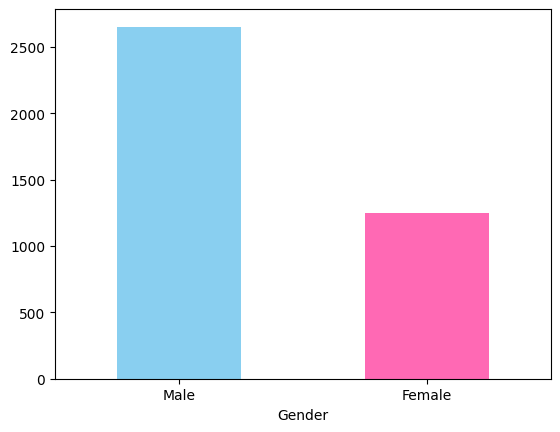

In [8]:
ax= df['Gender'].value_counts().plot(kind='bar', rot=0, color= color)
plt.show()

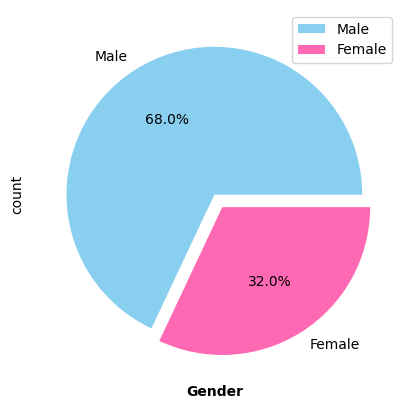

In [9]:
counts = df['Gender'].value_counts()
counts.plot(kind='pie',colors = color, explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel('Gender', weight = 'bold')
plt.legend()
plt.show()

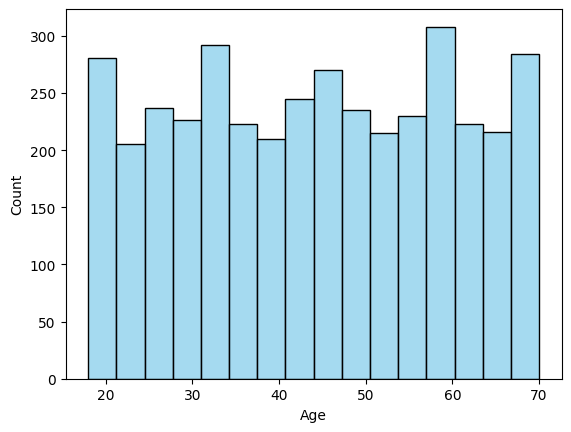

In [11]:
sns.histplot(data=df['Age'], color='skyblue')
plt.show()

In [12]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

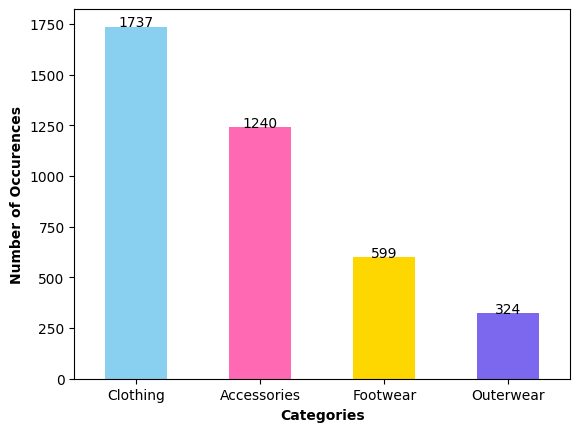

In [14]:
ax = df["Category"].value_counts().plot(kind='bar',color = color, rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1), ha='center')
    
plt.xlabel('Categories', weight="bold")
plt.ylabel('Number of Occurences', weight='bold')
plt.show()

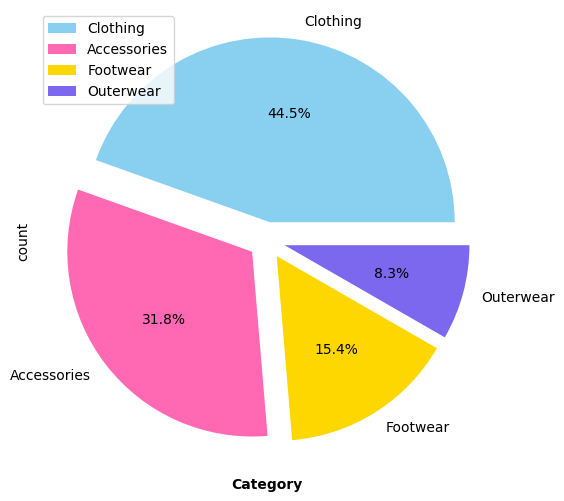

In [17]:
plt.figure(figsize = (20,6))
counts = df["Category"].value_counts()
explode =[0.1]*len(counts)
counts.plot(kind='pie',colors=color, explode=explode, autopct='%1.1f%%')
plt.xlabel('Category',weight='bold')
plt.legend()
plt.show()

In [18]:
def get_pieChart(column):
    plt.figure(figsize=(20,6))
    counts=df[column].value_counts()
    explode=[0]*(len(counts)-1)+[0.1]
    counts.plot(kind='pie',colors=color, explode=explode, autopct='%1.1f%%')
    plt.xlabel(column, weight='bold')
    plt.legend()
    plt.show()

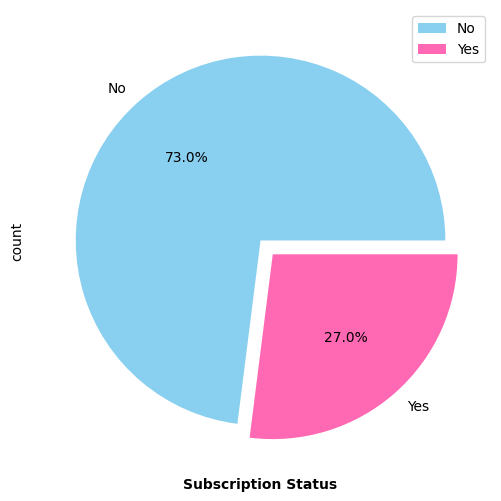

In [19]:
get_pieChart("Subscription Status")

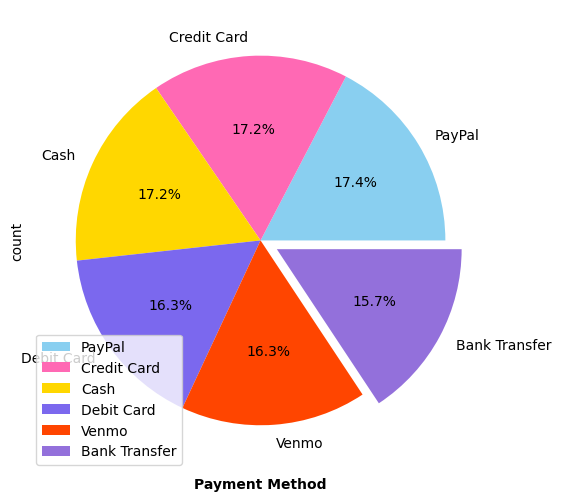

In [20]:
get_pieChart("Payment Method")

In [24]:
def getBarChart(column):
    plt.figure(figsize=(20,6))
    ax = df[column].value_counts().plot(kind='bar',color=color, rot=0)
    
    for p in ax.patches:
        ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center')
        
    plt.xlabel(column, weight="bold")
    plt.ylabel('Number of Occurances', weight='bold')
    plt.show()

AttributeError: 'Rectangle' object has no attribute 'getheight'

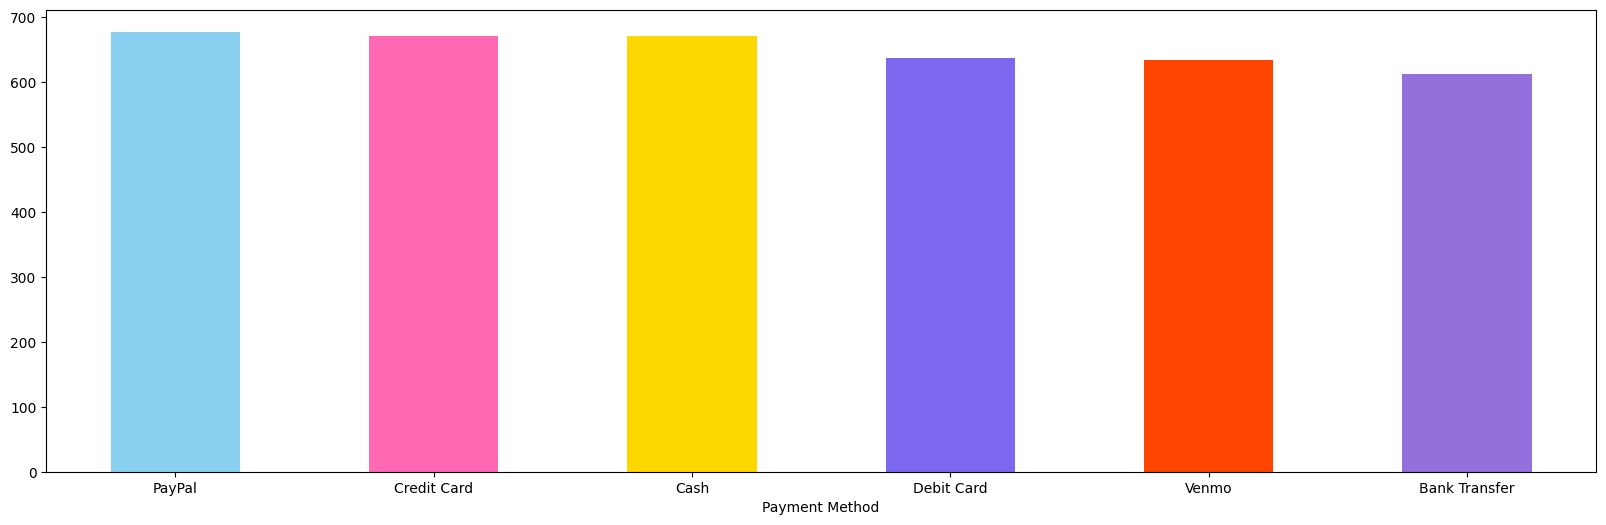

In [22]:
getBarChart('Payment Method')

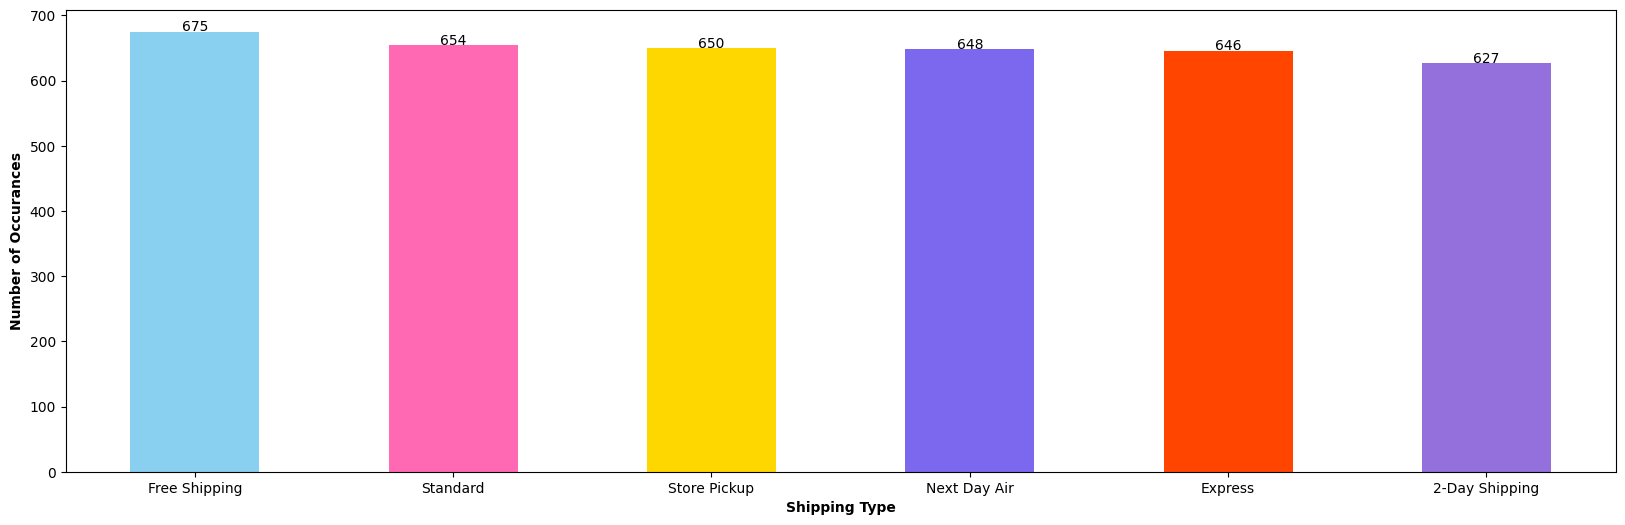

In [25]:
getBarChart('Shipping Type')

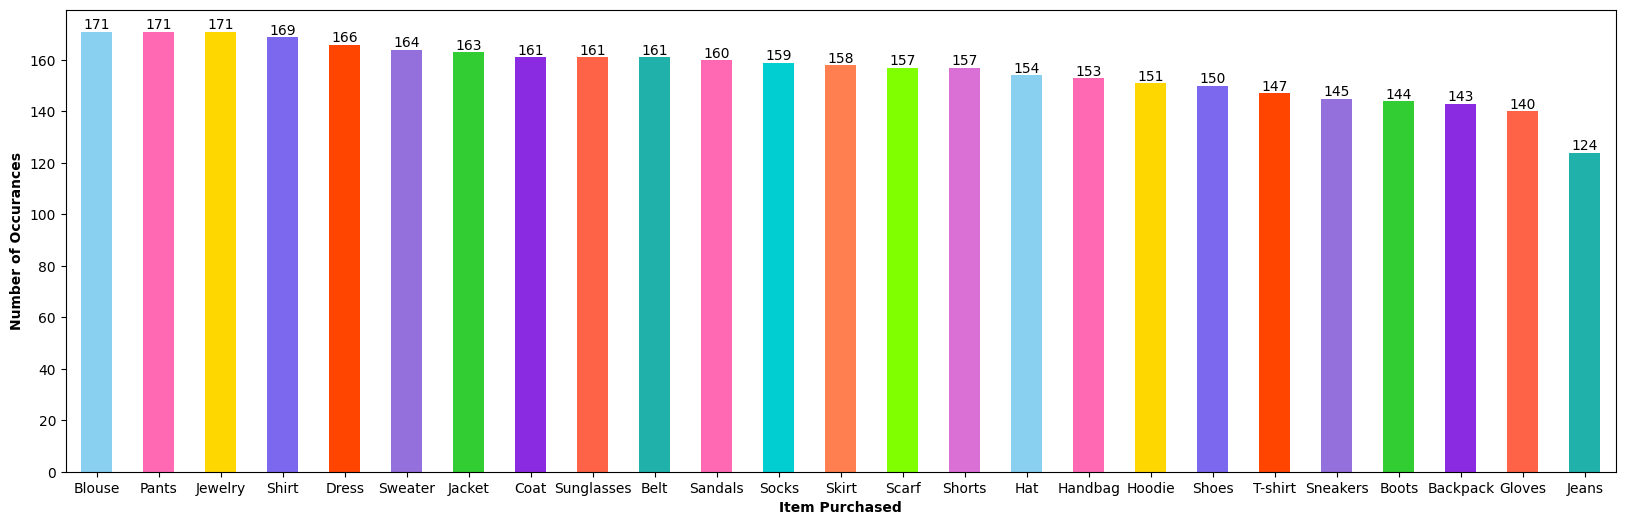

In [26]:
getBarChart('Item Purchased')

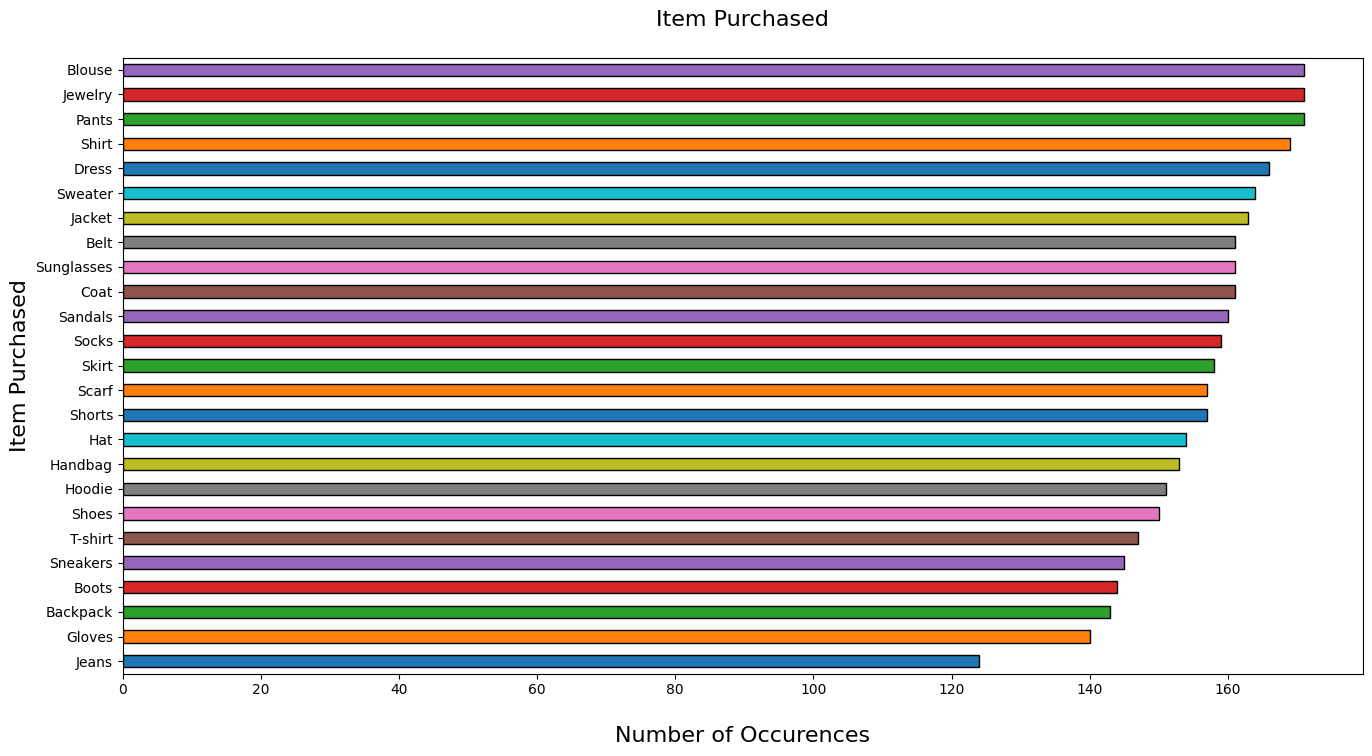

In [28]:
plt.figure(figsize=(16,8))
df['Item Purchased'].value_counts().sort_values().plot(kind='barh',color=sns.color_palette("tab10"),edgecolor='black')

plt.ylabel('Item Purchased', fontsize=16)
plt.xlabel('\nNumber of Occurences',fontsize=16)
plt.title('Item Purchased\n', fontsize=16)

plt.show()

In [29]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

In [30]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [37]:
df['Category'].value_counts()
df['Color'].value_counts()
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

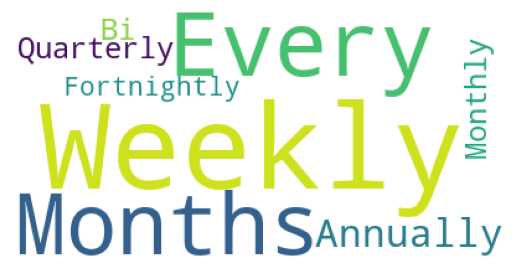

In [40]:
text=" ".join(title for title in df["Frequency of Purchases"])
word_cloud = WordCloud(collocations = False, background_color='white').generate(text)
plt.axis("off")
plt.imshow(word_cloud)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickets'

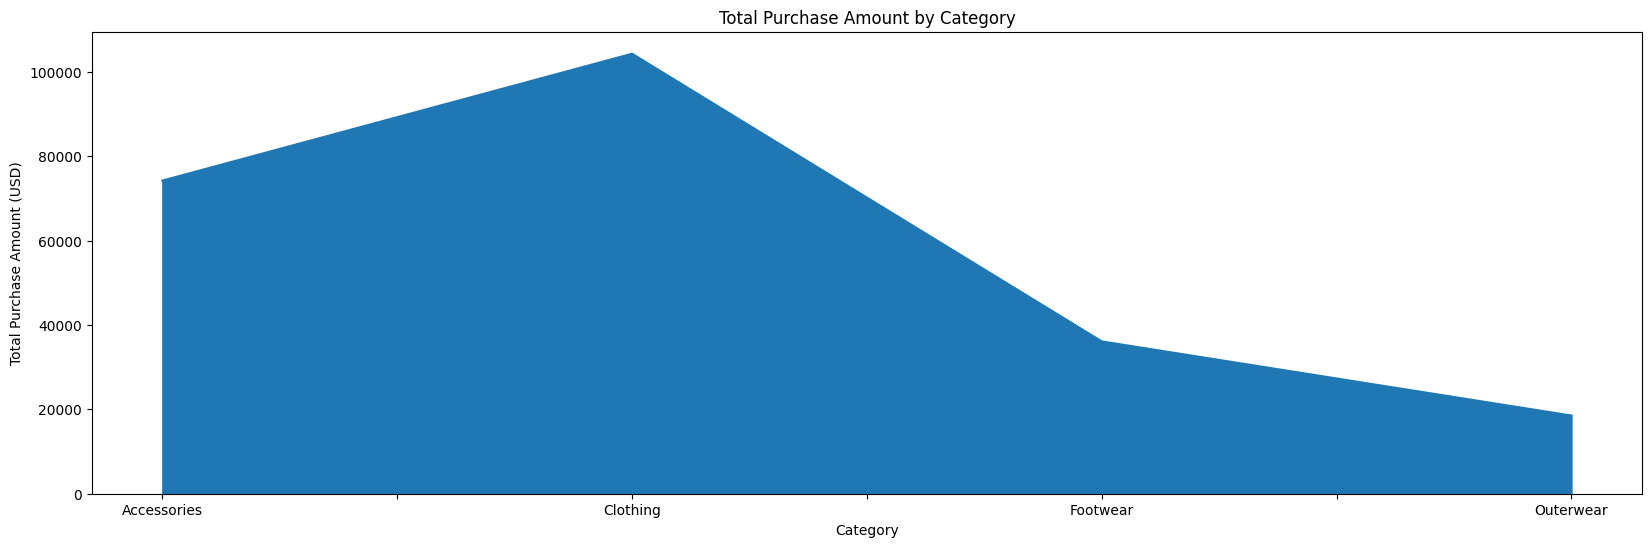

In [45]:
plt.figure(figsize=(20,6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xtickets(rotation=45)
plt.show()

In [46]:
# What is the average age of customers in the dataset?
average_age=df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [47]:
#What is the most common item purchased?
df['Item Purchased'].mode()
df['Item Purchased'].mode()[0]

'Blouse'

In [48]:
df[df['Gender']=='Male']['Item Purchased'].mode()

0    Pants
Name: Item Purchased, dtype: object

In [49]:
df[df['Gender']=='Female']['Item Purchased'].mode()

0    Blouse
Name: Item Purchased, dtype: object

In [50]:
#What is the most common season for purchase?
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchase:", most_common_season)

Most Common Season for Purchase: Spring


In [51]:
#what is the max and min review rating in the dataset
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [52]:
#what is the average review rating in the dataset for male and female customers seperately
average_rating_male = df[df['Gender']=='Male']['Review Rating'].mean()
average_rating_female = df[df['Gender']=='Female']['Review Rating'].mean()
print("Average Review Rating for male customers:", average_rating_male)
print("Average Review Rating for female customers:", average_rating_female)

Average Review Rating for male customers: 3.7539592760180995
Average Review Rating for female customers: 3.741426282051282


In [53]:
#what is the most common category of items purchased by male customers in the winter season with a review rating below 3?
common_category_low_rating_male_winter = df[(df['Gender']=='Male')
                                            &(df['Season']=='Winter')
                                            &(df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most common category for low-rating male customers in winter season:", common_category_low_rating_male_winter)

Most common category for low-rating male customers in winter season: Clothing


In [54]:
#how many customers have a subscription status of 'Yes' and used a promo code for their purchase
subscription_promo_count = df[(df['Subscription Status']=='Yes')
                              &(df['Promo Code Used']=='Yes')]['Customer ID'].count()
print("Number of customers with subscription and promo code used:", subscription_promo_count)

Number of customers with subscription and promo code used: 1053
